使用するライブラリのインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import math
from numpy.random import rand

## 1.6.1
次の自由端-固定端の行列に対し，$u^TTu$ を$u_1^2$，$u_1u_2$，$u_2^2$ の線形結合として表せ．

$$T = \begin{pmatrix}1 & -1 \\ -1 & 2\end{pmatrix}$$

正定値性を証明するため，上記の答を2個の平方の和として表せ．

### 解答

$$
\begin{align}
u^TTu &= \begin{pmatrix}u_1 & u_2\end{pmatrix}
          \begin{pmatrix}1 & -1 \\ -1 & 2\end{pmatrix}
          \begin{pmatrix}u_1 \\ u_2\end{pmatrix}  \\ \\
      &= u_1^2-2u_1u_2+2u_2^2 \\
      &= (u_1-u_2)^2+u_2^2
\end{align}
$$

以上より
$$
\begin{align}
    u_1 - u_2 &= 0  \\
    u_2 &= 0 
\end{align}
$$

を満たすとき，つまり$u_1 = u_2 = 0$ のときのみ，$u^TTu = 0$ となるため，行列$T$は正定値である．

## 1.6.2
$u^TKu = 4u_1^2+16u_1u_2+26u_2^2$ を2個の平方の和として表せ．それから$chol(K) = \sqrt{D}L^T$ を求めよ．

$$K = \begin{pmatrix}4 & 8 \\ 8 & 26\end{pmatrix}
    = \begin{pmatrix}1 & 0 \\ 2 & 1\end{pmatrix}\begin{pmatrix}4 &  \\  & 10\end{pmatrix}\begin{pmatrix}1 & 2 \\ 0 & 1\end{pmatrix}
    = (L\sqrt{D})(\sqrt{D}L^T)$$
### 解答

$$
\begin{align}
u^TKu &= 4u_1^2+16u_1u_2+26u_2^2  \\
      &= 4(u_1+2u_2)^2+10u_2^2
\end{align}
$$

$chol(K) = \sqrt{D}L^T$であるため，

$$
\sqrt{D} = \begin{pmatrix}2 & 0 \\ 0 & \sqrt{10}\end{pmatrix}
$$

なので，

$$
\begin{align}
chol(K) &= \begin{pmatrix}2 & 0 \\ 0 & \sqrt{10}\end{pmatrix} \begin{pmatrix}1 & 2 \\ 0 & 1\end{pmatrix} \\ \\
        &= \begin{pmatrix}2 & 4 \\ 0 & \sqrt{10}\end{pmatrix}
\end{align}
$$

## 1.6.3
別のAを用いると，巡回型の2階差分の行列$C = A^TA$ を生成することができる．

$$A = \begin{pmatrix}1 & -1 & 0\\0 & 1 & -1\\-1 & 0 & 1\end{pmatrix}$$ とすると， $$A^TA = \begin{pmatrix}2 & -1 & -1\\-1 & 2 & -1\\-1 & -1 & 2\end{pmatrix}$$

$C = A^TA$ が半正定値に過ぎないことをAから説明できるか？ベクトル$u$をどう選べば，$Au = 0$，したがって$Cu = 0$ が成り立つか？  
$chol(C)$ は失敗することに注意．
### 解答

$C$の正定値性を確認するには，定義通り$u^TCu > 0$かどうかを調べる必要がある．

$$
\begin{align}
u^TCu &= u^TA^TAu
      &= (Au)^T(Au)
\end{align}
$$

本文中にあったように，これはベクトル$Au$の長さの2乗に過ぎない．  
つまり負の値は取らず，0以上であることがわかるため，少なくとも半正定値であることがわかる．  

本文の流れから察すると，ここでは行列$A$の列ベクトルが線形独立かどうかを考える必要がある．

$$
\begin{align}
A &= \begin{pmatrix}1 & -1 & 0 \\ 0 & 1 & -1 \\ -1 & 0 & 1\end{pmatrix}
  &= \begin{pmatrix}v_1 & v_2 & v_3\end{pmatrix}
\end{align}
$$

とする．すると明らかに，

$$
v_1+v_2+v_3 = 0
$$

であり，線形従属である．  
つまり$u$を以下のように設定すると，$Au = 0$であり，Aは半正定値であることがわかる．

$$
u = \begin{pmatrix}1 \\ 1 \\ 1\end{pmatrix}
$$



また半正定値であることは，$Au = 0$が$u = 0$以外で成り立つということである．  
$u = 0$以外で$Au=0$が成立するかどうかは，$A$の固有値に0が含まれているかどうかと同義である．  

In [11]:
A = [[1, -1, 0], [0, 1, -1],[-1, 0, 1]]
la, v = np.linalg.eig(A)
print('eigen values')
for i in range(len(la)):
    print("lamda_%s:%s" % (i, la[i]))
    
print('eigen vectors')
for i in range(len(v)):
    print("v_%s:%s" % (i, v[i]))

eigen values
lamda_0:(8.88365811062e-17+0j)
lamda_1:(1.5+0.866025403784j)
lamda_2:(1.5-0.866025403784j)
eigen vectors
v_0:[-0.57735027+0.j  0.57735027+0.j  0.57735027-0.j]
v_1:[-0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]
v_2:[-0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]


上のように，固有値0であることは求まっているものの，なぜか固有ベクトルの計算が間違っている．  

## 1.6.4
ピボットのテストにより，巡回行列$C = A^TA$ が半正定値であることを確認せよ．  
$u^TCu$ を，ピボットを係数とする2個の平方の和の形に書け(固有値が0,3,3であることは，Cが半正定値であることのもう一つの証明を与える)．
### 解答

上の問題の流れから行列$C$は 3 x 3として考える．まず行列$C$の$LDL^T$分解を考える．  

$$
C = \begin{pmatrix}2 & -1 & -1 \\ -1 & 2 & -1 \\ -1 & -1 & 2\end{pmatrix}
  = \begin{pmatrix}1 & 0 & 0 \\ -\frac{1}{2} & 1 & 0 \\ -\frac{1}{2} & -1 & 1\end{pmatrix}
    \begin{pmatrix}2 & 0 & 0 \\ 0 & \frac{3}{2} & 0 \\ 0 & 0 & 0\end{pmatrix}
    \begin{pmatrix}1 & -\frac{1}{2} & -\frac{1}{2} \\ 0 & 1 & -1 \\ 0 & 0 & 1\end{pmatrix}
$$

一方で$u^TCu$を計算すると，  

$$
\begin{align}
u^TCu = 2u_1^2+2u_2^2+2u_3^2-2u_1u_2-2u_2u_3-2u_3u_1
\end{align}
$$

以上より，ピボット・乗数を参考に$u^TCu$を平方完成すると，

$$
u^TCu = 2(u_1-\frac{1}{2}u_2-\frac{1}{2}u_3)^2+\frac{3}{2}(u_2-u_3)^2
$$

よって$u^TCu = 0$の条件は$u_1 = u_2 = u_3$であり，1.6.3で求めた結果と一致していることがわかる．

## 1.6.5
$u^TCu \geq 0$ は任意の$u_1, u_2, u_3$に対して$u_1^2+u_2^2+u_3^2 \geq u_1u_2+u_2u_3+u_3u_1$ が成り立つことを意味する．  
この不等式を証明するもう少し普通でない方法は，シュヴァルツの不等式$|v^Tw| \leq ||v|| ||w||$を用いることである．

$$|u_1u_2+u_2u_3+u_3u_1| \leq \sqrt{u_1^2+u_2^2+u_3^2} \sqrt{u_2^2+u_3^2+u_1^2}$$

統合が成り立つときの$u$は何か？また，そのような$u$に対して$u^TCu = 0$ が成り立つことを確認せよ． 
### 解答

確かに，$u^TCu = 2(u_1^2+u_2^2+u_3^2-u_1u_2-u_2u_3-u_3u_1)$であるため，
$u^TCu \geq 0$は，$u_1^2+u_2^2+u_3^2 \geq u_1u_2+u_2u_3+u_3u_1$と同値である．  

ここで以下のようにベクトル$v, w$を設定する．

$$
v = \begin{pmatrix}u_1 \\ u_2 \\ u_3\end{pmatrix}，w = \begin{pmatrix}u_2 \\ u_3 \\ u_1\end{pmatrix}
$$

シュヴァルツの不等式の詳細な証明は省略する．  
イメージとしては，ベクトルの絶対値の積と，内積の2乗の大きさを比較している感じ．  
2つのベクトルが少しでもずれていれば，内積の方が小さくなるが，2つのベクトルが平行な場合，等式は成立する．  
  
参考URL(https://mathtrain.jp/schwarz)  
  
つまり実数$k$に対して，

$$
\begin{align}
u_1 &= ku_2  \\
u_2 &= ku_3  \\
u_3 &= ku_1
\end{align}
$$

上式を満たすのは$u_1 = u_2 = u_3$のときだけであり，これは1.6.3，1.6.4の結果とも一致する．

## 1.6.6
$b$ がどの範囲にあれば，次の行列は正定値となるか？

$$K = \begin{pmatrix}1 & b \\ b & 4\end{pmatrix}$$

$K$ が半正定値となる境界のbの値が2つある．これらの場合について，$u^TKu$ を1つの平方として書け．$b = 5$ の場合にピボットを求めよ．
### 解答

まず$u^TKu$を計算する．

$$
\begin{align}
u^TKu &= u_1^2+2bu_1u_2+4u_2^2 \\
      &=(u_1+bu_2)^2+(4-b^2)u_2^2
\end{align}
$$

上のように平方完成できるため，$-2 < b < 2$のとき，$K$は正定値となる．  
また，$K$が半正定値となる境界は$b = \pm 2$であることがわかる．  
このとき$u^TKu$は以下のようになる．

$$
u^TKu = (u_1\pm2u_2)^2
$$

さらに，$b = 5$のとき，$K$を$LDL^T$分解すると，

$$
K = \begin{pmatrix}1 & 5 \\ 5 & 4\end{pmatrix}
  = \begin{pmatrix}1 & 0 \\ -5 & 1\end{pmatrix}
    \begin{pmatrix}1 & 0 \\ 0 & -21\end{pmatrix}
    \begin{pmatrix}1 & -5 \\ 0 & 1\end{pmatrix}
$$

ゆえにピボットは$1, -21$であり，負のピボットが含まれているため不定値となることがわかる．  
またこの結果は，上で求めた$b$の条件とも矛盾しない．

## 1.6.7
行列$K = A^TA, M = B^TB$ は正定値か ($A$と$B$の列は線形独立か)？

$$A = \begin{pmatrix}1 & 2 \\ 2 & 4 \\ 3 & 6\end{pmatrix}，B = \begin{pmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6\end{pmatrix}$$

$u^TMu = (Bu)^T(Bu) = (u_1+4u_2)^2+(2u_1+5u_2)^2+(3u_1+6u_2^2)$ である．  
$u^TKu = (Au)^T(Au)$ における3個の平方の和が1個の平方で書き直せることを示せ．
### 解答

明らかに行列$A$の列ベクトルは線形従属であり，行列$B$の列ベクトルは線形独立である．  
ゆえに行列$A$は半正定値，行列$B$は正定値であることが予想される．  
そこで実際に$u^TMu$と$u^TKu$を計算してみる．  

$$
\begin{align}
u^TMu &= (u_1+4u_2)^2+(2u_1+5u_2)^2+(3u_1+6u_2^2) \\
u^TKu &= (u_1+2u_2)^2+(2u_1+4u_2)^2+(3u_1+6u_2^2) \\
      &= (u_1+2u_2)^2+4(u_1+2u_2)^2+9(u_1+2u_2^2) \\
      &= 14(u_1+2u_2)^2
\end{align}
$$

以上から行列$M$が正定値であり，$u_1 = -2u_2$で$u^TKu = 0$となるため，行列$K$が半正定値であることを再確認できる．

## 1.6.8
次の$A_1, A_2, A_3, A_4$ のうち，2個の正の固有値を持つのはどれか？　　
$\lambda$ を計算せずに，$a > 0$ かつ $ac > b^2$ という判定法を用いよ．$u^TA_1u < 0$ となるベクトル$u$を求めよ．

$$A_1 = \begin{pmatrix}5 & 6 \\ 6 & 7\end{pmatrix}，A_2 = \begin{pmatrix}-1 & -2 \\ -2 & -5\end{pmatrix}，
  A_3 = \begin{pmatrix}1 & 10 \\ 10 & 100\end{pmatrix}，A_4 = \begin{pmatrix}1 & 10 \\ 10 & 101\end{pmatrix}$$
### 解答

1.5節　固有値と固有ベクトルの内容から，  
行列式は固有値$\lambda$の積であるため，固有値が2つとも正であるならば行列式は正になるはずである．  
あと考えるべきは和であり，$a > 0$というよりもトレースを考えるべきだと思うのですがどうでしょう．  
今回はトレースで考えます．するとトレースと行列式がともに正になるのは$A_4$のみであることがわかる．

また$u_TA_1u < 0$について考えると，

$$
u^TA_1u = 5u_1^2+7u_2^2+12u_1u_2 < 0
$$

つまり，(u_1, u_2)平面において$5u_1^2+7u_2^2+12u_1u_2$を満たす領域であることがわかる．
これは双曲線関数かな？

## 1.6.9
次の行列は，$b$ と $c$ をどう選べば正定値となるか？

$$A = \begin{pmatrix}1 & b \\ b & 9\end{pmatrix}，A = \begin{pmatrix}2 & 4 \\ 4 & c\end{pmatrix}$$

ピボットの行列を$D$，定数の行列を$L$として，それぞれの$A$を$LDL^T$と分解せよ．
### 解答

それぞれの行列を$LDL^T$分解してみる．

$$
A = \begin{pmatrix}1 & b \\ b & 9\end{pmatrix}
  = \begin{pmatrix}1 & 0 \\ b & 1\end{pmatrix}
    \begin{pmatrix}1 & 0 \\ 0 & 9-b^2\end{pmatrix}
    \begin{pmatrix}1 & b \\ 0 & 1\end{pmatrix}
$$

ピボットの値は，平方完成したときに平方の係数となるため，正定値であるためにはピボット全て正である必要がある．  
よってこの行列$A$の場合，$9-b^2 > 0$が条件となり，つまり$-3 < b < 3$のとき$A$は正定値となる．  
  
同様に2つ目の$A$に対しても計算をすると，

$$
A = \begin{pmatrix}2 & 4 \\ 4 & c\end{pmatrix}
  = \begin{pmatrix}1 & 0 \\ 2 & 1\end{pmatrix}
    \begin{pmatrix}2 & 0 \\ 0 & c-8\end{pmatrix}
    \begin{pmatrix}1 & 2 \\ 0 & 1\end{pmatrix}
$$

以上より，2つ目の行列$A$が正定値であるためには，$c-8 > 0$，つまり$c > 8$である必要がある．

## 1.6.10
関数 $f(x, y) = x^2+4xy+3y^2$ は，係数が正であるが，点$(0, 0)$ で最小値を持たないことを示せ．  
$f$ を平方の差として表し，$f$ が負となる点$(x, y)$ を見つけよ．
### 解答

$u = \begin{pmatrix}x & y\end{pmatrix}^T$とし，$u^TAu$の形に書き直すと，

$$
f(x, y) = \begin{pmatrix}x & y\end{pmatrix}
          \begin{pmatrix}1 & 2 \\ 2 & 3\end{pmatrix}
          \begin{pmatrix}x \\ y\end{pmatrix}
$$

上で見てきたように，ここから$f(x, y)$の正定値性を確認する方法はいろいろあるが，ここでは1.6.9のようにピボットによって確認することにする．  
行列$A$を$LDL^T$分解すると，

$$
A = \begin{pmatrix}1 & 2 \\ 2 & 3\end{pmatrix}
  = \begin{pmatrix}1 & 0 \\ 2 & 1\end{pmatrix}
    \begin{pmatrix}1 & 0 \\ 0 & -1\end{pmatrix}
    \begin{pmatrix}1 & 2 \\ 0 & 1\end{pmatrix}
$$

ゆえに，$u^TAu = (x+2y)^2-y^2$と書け，行列$A$は不定値であり，$(0, 0)$で最小値を持たないことがわかる．  
つまり，$x+2y = 0$を満たすとき，$u^TAu \leq 0$となることは明らかである．

## 1.6.11
関数 $f(x, y) = 2xy$ は明らかに点$(0, 0)$で鞍点を持ち，最小値は持たない．この$f$ を生成する対称行列$S$ を求めよ．その固有値は何か？
### 解答

1.6.10と同様に$u = \begin{pmatrix}x & y\end{pmatrix}^T$とし，$u^TAu$の形に書き直すと，

$$
f(x, y) = \begin{pmatrix}x & y\end{pmatrix}
          \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}
          \begin{pmatrix}x \\ y\end{pmatrix}
$$

ゆえに対称行列$S$は，

$$
S = \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}
$$

In [5]:
S = [[0, 1], [1, 0]]
la, v = np.linalg.eig(S)
print('eigen values')
for i in range(len(la)):
    print("lamda_%s:%s" % (i, la[i]))
    
print('eigen vectors')
for i in range(len(v)):
    print("v_%s:%s" % (i, v[i]))

eigen values
lamda_0:1.0
lamda_1:-1.0
eigen vectors
v_0:[ 0.70710678 -0.70710678]
v_1:[ 0.70710678  0.70710678]


##### 固有ベクトル逆じゃない？？

以上の計算から行列$S$の固有値は，$\lambda = \pm1$であり，  
$\lambda = 1$のとき，固有ベクトルは$v_1 = \begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2}\end{pmatrix}^T$   
$\lambda = -1$のとき，固有ベクトルは$v_2 = \begin{pmatrix}1/\sqrt{2} & -1/\sqrt{2}\end{pmatrix}^T$   
  
つまり$f(x, y) = 1((x+y)/\sqrt{2})^2-1((x-y)/\sqrt{2})^2$  
よって負の平方和が含まれているため，最小値は存在しないことがわかる．

## 1.6.12
次のそれぞれの行列$A$ について，列ベクトルを調べ，$A^TA$ が正定値となるかどうかを判定せよ．

$$A = \begin{pmatrix}1 & 2 \\ 0 & 3\end{pmatrix}，A = \begin{pmatrix}1 & 1 \\ 1 & 2 \\ 2 & 1\end{pmatrix}，
  A = \begin{pmatrix}1 & 1 & 2 \\ 1 & 2 & 1\end{pmatrix}$$
### 解答

正定値かどうかは，$u^T(A^TA)u$を調べる必要がある．  
しかし$u^T(A^TA)u = (Au)^TAu$であるため，$u \neq 0$において$Au > 0$であれば，正定値であることがわかる．  
つまり正定値性の判定をするには，Aの固有値に0が含まれていないかどうかを確認することや，  
行列$A$の列ベクトルが線形独立かどうかを調べることが考えられる．

ここでは列ベクトルの線形独立性から考える．  

まず$A = \begin{pmatrix}1 & 2 \\ 0 & 3\end{pmatrix}$から考える．  
明らかにこの行列の列ベクトルは線形独立であり，$A^TA$は正定値であると考えられる．試しに$u^TA^TAu$を確認してみると，

$$
\begin{align}
u^TA^TAu &= u_1^2+4u_1u_2+13u_2^2 \\
         &= (u_1+2u_2)^2+9u_2^2
\end{align}
$$

この結果から，確かに$A^TA$は正定値であることが確認できた．  
  
同様に$A = \begin{pmatrix}1 & 1 \\ 1 & 2 \\ 2 & 1\end{pmatrix}$も列ベクトルは線形独立であるため，正定値であると考えられる．  
今回試しにピボットを用いて確認をしてみると，  

$$
A^TA = \begin{pmatrix}6 & 5 \\ 5 & 6\end{pmatrix}
     = \begin{pmatrix}1 & 0 \\ 5/6 & 1\end{pmatrix}
       \begin{pmatrix}6 & 0 \\ 0 & 11/6\end{pmatrix}
       \begin{pmatrix}1 & 5/6 \\ 0 & 1\end{pmatrix}
$$

よって，2つのピボットが共に正であることから$A^TA$は正定値であることがわかる．  
  
一方で$A = \begin{pmatrix}1 & 1 & 2 \\ 1 & 2 & 1\end{pmatrix}$は，要素数2に対して列ベクトルが3であるため，明らかに線形従属である．  
よって，行列$A^TA$は半正定値となると考えられる．  
今回は$A^TA$の固有値を調べることで正定値性を確認してみると，  

$$
A^TA = \begin{pmatrix}2 & 3 & 3 \\ 3 & 5 & 4 \\ 3 & 4 & 5\end{pmatrix}
$$

この固有値を調べると，$\lambda = 0, 1, 11$であり，$u = 0$以外にも$A^TAu = 0$を満たすベクトルが存在しており，半正定値であることがわかる．

## 1.6.13
次の式を満たす 3x3 行列$S$を求め，そのピボット，階数，固有値，行列式を計算せよ．

$$\begin{pmatrix}x_1 & x_2 & x_3\end{pmatrix} \begin{pmatrix}&&\\&S&\\&&\end{pmatrix} 
  \begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} = 4(x_1-x_2+2x_3)^2$$
### 解答

$$
4(x_1-x_2+2x_3)^2 = 4x_1^2+4x_2^2+16x_3^3-8x_1x_2-16x_2x_3+16x_3x_1
$$

これから$S$を予想すると

$$
S = \begin{pmatrix}4 & -4 & 8 \\ -4 & 4 & -8 \\ 8 & -8 & 16\end{pmatrix}
$$

この行列$S$を$LDL^T$分解すると，

$$
S = \begin{pmatrix}4 & -4 & 8 \\ -4 & 4 & -8 \\ 8 & -8 & 16\end{pmatrix}
  = \begin{pmatrix}1 & 0 & 0 \\ -1 & 1 & 0 \\ 2 & 0 & 1\end{pmatrix}
    \begin{pmatrix}4 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0\end{pmatrix}
    \begin{pmatrix}1 & -1 & 2 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{pmatrix}
$$

つまり，ピボットは$4, 0$であり，階級は1であることがわかる．

また固有値を調べると$\lambda = 0(重解)，24$である．  
1.5節の内容から考えると，行列式 = 固有値の積であるから，行列式は0であると予想される．  
実際に計算をしてみても，行列式は0である．

## 1.6.14
以下の関数 $f = x^TSx$ を生成する 3x3 の対称行列$S$ は何か？  
最初の行列は正定値であり，2番目の行列はそうでないのはなぜか？

(a)  $f = 2(x_1^2+x_2^2+x_3^2-x_1x_2-x_2x_3)$  

(b)  $f = 2(x_1^2+x_2^2+x_3^2-x_1x_2-x_1x_3-x_2x_3)$

### 解答

上の問題と同様に対称行列$S$を求めると，  
(a)
$$
S = \begin{pmatrix}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2\end{pmatrix}
$$

(b)
$$
S = \begin{pmatrix}2 & -1 & -1 \\ -1 & 2 & -1 \\ -1 & -1 & 2\end{pmatrix}
$$

(a)のときの$S$は今まで行列$K$として扱ってきた行列であり，一方で(b)における$S$は$C$として扱ってきた行列である．

#### なぜ最初の行列は正定値であり，2番目の行列は正定値でないか．

## 1.6.15
次の行列$A, B$ は，$c$ と $d$ をどう選べば正定値になるか？  
それぞれの行列について，3個の左上の小行列式(1 x 1, 2 x 2, 3 x 3) を計算してみよ．

$$A = \begin{pmatrix}c & 1 & 1 \\ 1 & c & 1 \\ 1 & 1 & c\end{pmatrix}，
  B = \begin{pmatrix}1 & 2 & 3 \\ 2 & d & 4 \\ 3 & 4 & 5\end{pmatrix}$$
### 解答

まず行列$A$のピボット行列$D$を求める．  

$$
D = \begin{pmatrix}1 & 0 & 0 \\ -1/c & 1 & 0 \\ -1/(c+1) & -1/(c+1) & 1\end{pmatrix}
    \begin{pmatrix}c & 1 & 1 \\ 1 & c & 1 \\ 1 & 1 & c\end{pmatrix}
    \begin{pmatrix}1 & -1/c & -1/(c+1) \\ 0 & 1 & -1/(c+1) \\ 0 & 0 & 1\end{pmatrix}
  = \begin{pmatrix}c & 0 & 0 \\ 0 & (c^2-1)/c & 0 \\ 0 & 0 & (c^2+c-2)/(c+1)\end{pmatrix}
$$

$A$が正定値であるためには，全てのピボットが正である必要がある．つまり，  

$$
c > 0 \\
c^2-1 > 0 \\
c^2+c-2 > 0
$$

以上の条件を整理すると，  

$$
c > 0 \\
c < -1　または　c > 1 \\
c < -2　または　c > 1
$$

ゆえに$c > 1$のとき，行列$A$は正定値となる．  
  
行列$B$に対しても同様に行列$D$を求めると，

$$
D = \begin{pmatrix}1 & 0 & 0 \\ -2 & 1 & 0 \\ -(3d-8)/(d-4) & 2/(d-4) & 1\end{pmatrix}
    \begin{pmatrix}1 & 2 & 3 \\ 2 & d & 4 \\ 3 & 4 & 5\end{pmatrix} 
    \begin{pmatrix}1 & -2 & -(3d-8)/(d-4) \\ 0 & 1 & 2/(d-4) \\ 0 & 0 & 1\end{pmatrix}
  = \begin{pmatrix}1 & 0 & 0 \\ 0 & d-4 & 0 \\ 0 & 0 & -(4d-12)/(d-4)\end{pmatrix}
$$

ゆえに，

$$
d - 4 > 0 \\
4d -12 < 0
$$

であり，いかなる$d$に対しても行列$B$は正定値にならないと考えられる．

また要求されたため，首座小行列の計算もしてみる．  

行列$A$の場合は，  

$$
\begin{align}
1 \times 1 &: c \\
2 \times 2 &: c^2 -1 \\
3 \times 3 &: c^3-3c+2 = (c-1)(c^2+c-2) \\
\end{align}
$$

つまりこの条件は，ピボットによる計算と一致する．最初からこれでやればよかった．  

行列$B$に対しても同様に，  

$$
\begin{align}
1 \times 1 &: 1 \\
2 \times 2 &: d-4 \\
3 \times 3 &: -4d+12 \\
\end{align}
$$

この条件もピボットによる計算と一致していることがわかる．

## 1.6.16
$A$ が正定値ならば，$A^{-1}$ も正定値である．最良の証明は次の通り：  

$A^{-1}$ の固有値は正である．なぜなら......  

もう一つの証明 (2 x 2行列の場合のみ簡単に適用できる)：  

$A^{-1} = \frac{1}{ac-b^2}\begin{pmatrix}c & -b \\ -b & a\end{pmatrix}$ の要素は少行列式によるテストをパスする．なぜなら....
### 解答

行列$A$が正定値であることから，行列$A$の持つ固有値は全て正である．
一方で1.5節で見てきたように，行列$A$が固有値$\lambda_1, \lambda_2, ... , \lambda_n$を持つとき，  
逆行列$A^{-1}$の固有値は$1/\lambda_1, 1/\lambda_2, ... , 1/\lambda_n$である．  
つまり逆行列$A^{-1}$の固有値も全て正になるため，$A^{-1}$も正定値であることがわかる．  
  
  
一方2 x 2行列の場合，より簡単に証明できる．  
まず行列$A$を以下のように設定する．  

$$
A = \begin{pmatrix}a & b \\ b & c\end{pmatrix}
$$

すると$A^{-1}$は問題文のように求めることができる．

$$
A^{-1} = \frac{1}{ac-b^2}\begin{pmatrix}c & -b \\ -b & a\end{pmatrix}
$$

次に行列$A$が正定値であることから求まる条件を考える．正定値とはゼロベクトルでない，いかなる$u$に対しても，$u^TAu > 0$であることであった．  
そこで$u = \begin{pmatrix}u_1 & u_2\end{pmatrix}^T$とし，$u^TAu$を考えると，  

$$
\begin{align}
u^TAu &= au_1^2-2bu_1u_2+cu_2^2 \\
      &= c(u_2-\frac{b}{c}u_1)^2+\frac{ac-b^2}{c}u_1^2
\end{align}
$$

よって$u^TAu > 0$を満たすためには，$c > 0$かつ$ac-b^2 > 0$である必要がある．  
この2つの条件は，$A^{-1}$の首座小行列式が正であることを表している．  
ゆえに，$A^{-1}$の要素は少行列式によるテストをパスし，正定値であることが証明された．

## 1.6.17
正定値行列は対角にゼロ (あるいはもっと悪く負の値) を持つことができない．次の行列は$u^TAu > 0$ というテストをパスしないことを示せ．

$$\begin{pmatrix}u_1 & u_2 & u_3\end{pmatrix} 
   \begin{pmatrix}4 & 1 & 1 \\ 1 & 0 & 2 \\ 1 & 2 & 5\end{pmatrix}
   \begin{pmatrix}u_1 \\ u_2 \\ u_3\end{pmatrix} 
$$

上の行列積は$(u_1, u_2, u_3) = ( , , )$ のとき正でない．

### 解答

$u = \begin{pmatrix}u_1 & u_2 & u_3\end{pmatrix}^T$とし，$u^TAu$を調べてみる．  

$$
\begin{align}
u^TAu &= 4u_1^2+0u_2^2+5u_3^2+2u_1u_2+4u_2u_3+2u_3u_1 \\
\end{align}
$$

平方完成が面倒なので，そのためにまずこの行列$A$を$LDL^T$分解すると，

$$
A  = \begin{pmatrix}1 & 0 & 0 \\ 1/4 & 1 & 0 \\ 1/4 & -7 & 1\end{pmatrix}
     \begin{pmatrix}4 & 0 & 0 \\ 0 & -1/4 & 0 \\ 0 & 0 & 17\end{pmatrix}
     \begin{pmatrix}1 & 1/4 & 1/4 \\ 0 & 1 & -7 \\ 0 & 0 & 1\end{pmatrix}
$$

よって，

$$
\begin{align}
u^TAu &= \begin{pmatrix}u_1 & u_2 & u_3 \end{pmatrix}
         \begin{pmatrix}1 & 0 & 0 \\ 1/4 & 1 & 0 \\ 1/4 & -7 & 1\end{pmatrix}
         \begin{pmatrix}4 & 0 & 0 \\ 0 & -1/4 & 0 \\ 0 & 0 & 17\end{pmatrix}
         \begin{pmatrix}1 & 1/4 & 1/4 \\ 0 & 1 & -7 \\ 0 & 0 & 1\end{pmatrix}
         \begin{pmatrix}u_1 \\ u_2 \\ u_3 \end{pmatrix} \\
      &= \begin{pmatrix}u_1+\frac{1}{4}u_2+\frac{1}{4}u_3 & u_2-7u_3 & u_3 \end{pmatrix}
         \begin{pmatrix}4 & 0 & 0 \\ 0 & -1/4 & 0 \\ 0 & 0 & 17\end{pmatrix}
         \begin{pmatrix}u_1+\frac{1}{4}u_2+\frac{1}{4}u_3 \\ u_2-7u_3 \\ u_3 \end{pmatrix} \\
      &= 4(u_1+\frac{1}{4}u_2+\frac{1}{4}u_3)^2-\frac{1}{4}(u_2-7u_3)^2+17u_3^2
\end{align}
$$

以上のように平方完成できた．ここからわかるように負の2乗項が含まれているため，正定値ではない．  
正定値とならないベクトル$u$を求めるには，正の2乗項の係数を0にするように求めれば良い．ゆえに，実変数kとして，  

$$
\begin{pmatrix}u_1 \\ u_2 \\ u_3\end{pmatrix} = k\begin{pmatrix}1 \\ -4 \\ 0\end{pmatrix}
$$

## 1.6.18
対称行列の対角要素$a_{jj}$は最小固有値よりも小さくなることはできない．もしできたとすると，$A - a_{jj}I$は...の固有値を持ち，したがって正定値となる．ところが，$A - a_{jj}I$ は主対角線上にゼロを持つ．
### 解答

対象とする対角成分を$a_{jj}$，最小固有値を$\lambda_{min}$とし，
$a_{jj} < \lambda_{min}$が成立すると仮定する．

1.5節の内容から，$AB = BA$が成立する行列では，固有値の和が成立することがわかっている．  
よって$A-a_{jj}I$の固有値は，もともとの$A$の固有値から$a_{jj}$だけ引いた値になる．
すなわち，最小固有値は$\lambda_{min}-a_{jj} > 0$である．  

よって$A-a_{jj}I$は全て正の固有値を持つため，正定値となる．
しかし対角成分にゼロをもつため，ピボットにはゼロが含まれてしまう．  
そのため，$A-a_{jj}I$は半正定値となり，矛盾が生じる．

## 1.6.19
$K$ のすべての固有値が正ならば，(固有ベクトル$x_i$に限らず)任意のベクトル$u \neq 0$ に対して$u^TKu > 0$であることを示せ．  
$u$ を固有ベクトルの線形結合として表せ．"クロス項" $x_i^Tx_j$がすべてゼロとなるのはなぜか？

$$u^TKu = (c_1x_1+..+c_nx_n)^T(c_1\lambda_1x_1+..+c_n\lambda_nx_n) = c_1^2\lambda_1x_1^Tx_1+..+c_n^2\lambda_nx_n^Tx_n > 0$$ 
### 解答

固有値が全て正ということは正定値だから，$u^TKu > 0$になることは予想できる．

行列$K$の対角化を考える．$K$の固有ベクトルを$x_1, x_2, ..., x_n$とする．
さらに正則行列$P$を以下のように定義し，$K$を書き直すと

$$
P = \begin{pmatrix}x_1 & x_2 & \ldots & x_n\end{pmatrix}
$$

$$
K = P^{-1}
    \begin{pmatrix}\lambda_1 & 0 & \ldots & 0 \\
                   0 & \lambda_2 & \ldots & 0 \\
                   \vdots & \vdots & \ddots & \vdots \\
                   0 & 0 & \ldots & \lambda_n
    \end{pmatrix}
    P
$$

$K$を対称行列であると仮定すると，$P^{-1}=P^T$である．

$u^TKu$を計算すると，
$u=\begin{pmatrix}c_1 & c_2 & \ldots & c_n\end{pmatrix}^T$とすると，
$$
\begin{align}
u^TKu &= u^TP^T\Lambda Pu \\
      &= \begin{pmatrix}c_1x_1 & c_2x_2 & \ldots & c_nx_n\end{pmatrix}
         \begin{pmatrix}\lambda_1 & 0 & \ldots & 0 \\
                   0 & \lambda_2 & \ldots & 0 \\
                   \vdots & \vdots & \ddots & \vdots \\
                   0 & 0 & \ldots & \lambda_n\end{pmatrix}
         \begin{pmatrix}c_1x_1 \\ c_2x_2 \\ \ldots \\ c_nx_n\end{pmatrix} \\
      &= c_1^2\lambda_1x_1^Tx_1+..+c_n^2\lambda_nx_n^Tx_n > 0
\end{align}
$$

よってベクトル$u$によらず，$u^TKu > 0$がわかった．

## 1.6.20
$A = \begin{pmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta\end{pmatrix}
     \begin{pmatrix}2 & 0 \\ 0 & 5\end{pmatrix}
     \begin{pmatrix}\cos\theta & \sin\theta \\ -\sin\theta & \cos\theta\end{pmatrix}
$ において，積を具体的に計算せずに次を求めよ．

(a) $A$ の行列式  
(b) $A$ の固有値  
(c) $A$ の固有ベクトル  
(d) $A$ が対称正定値である理由  
### 解答

(a)  
行列式はそれぞれの行列式の積となる．回転行列の行列式は1であるので，

$$
det(A) = 10
$$

(b)  
行列$A$の作用的な意味は，"まず$-\theta$回転させて，x軸方向に2，y軸方向に5拡大させる変換をし，$\theta$回転させてもとに戻す"ことである．
そのため固有値も固有ベクトルも回転行列による影響はないと考えられる．
ゆえに行列$A$の固有値は$\lambda = 2, 5$であると考えられる． 

(c)  
以上の理由から固有ベクトルは
$$
v_1 = \begin{pmatrix}1 \\ 0\end{pmatrix},  v_2 = \begin{pmatrix}0 \\ 1\end{pmatrix}
$$

(d)  
$$
R = \begin{pmatrix}cos\theta & sin\theta \\ -sin\theta & cos\theta\end{pmatrix}，D = \begin{pmatrix}2 & 0 \\ 0 &　5\end{pmatrix}
$$

とすると，$A = R^TDR$である．この行列$A$に対して，$v^TAv$を考えると

$$
v^TAv = v^TR^TDRv = (Rv)^TD(Rv)
$$

ここで行列$R$の列ベクトルは線形独立であるため$v \neq 0$のとき，$Rv \neq 0$である．  
また行列$D$は明らかに正定値であるので，

## 1.6.21
次の$f_1(x, y) = \frac{1}{4}x^4+x^2y+y^2$ と　$f_2(x, y) = x^3+xy-x$ について，2階微分の行列(ヘッシアン) $H_1$ および $H_2$ を求めよ．

$$H = \begin{pmatrix}\partial^2f / \partial x^2 & \partial^2f / {\partial x \partial y} \\
                     \partial^2f / {\partial y \partial x} & \partial^2f/ \partial y^2 \end{pmatrix}$$
                     
$H_1$は正定値だから，$f_1$ は凹（下に凸）である．$f_1$の最小点と$f_2$の鞍点を求めよ(1階微分がゼロとなる点を探せ)．

### 解答

言われた通りにヘッシアン$H_1$，$H_2$を求める．

$$
H_1 = \begin{pmatrix}3x^2+2y & 2x \\ 2x & 2\end{pmatrix}
$$

$$
H_2 = \begin{pmatrix}6x & 1 \\ 1 & 0\end{pmatrix}
$$

確認は行っていないが，$H_1$は正定値らしい．そこで$f_1$の最小点と$f_2$の鞍点を探す．

$$
\begin{align}
\frac{\partial f_1}{\partial x} &= x^3+2xy = x(x^2+2y) = 0\\
\frac{\partial f_1}{\partial y} &= x^2+2y = 0
\end{align}
$$

つまりこの条件を満たすとき，

$$
x = 0, y = 0　または　x^2+2y = 0
$$

またこのときの値は，$f_1(x,y) = 0$

一方で$f_2$の鞍点を考えると，

$$
\begin{align}
\frac{\partial f_2}{\partial x} &= 3x^2+y-1 = 0\\
\frac{\partial f_2}{\partial y} &= x = 0
\end{align}
$$

以上より，$x = 0, y = 1$のとき，$f_2$は鞍点を取り，またその値は，$f_2(0,1) = 0$である．

## 1.6.22
関数 $z = x^2+y^2$ のグラフは上に開いたお椀型をしている．$z = x^2-y^2$のグラフは鞍型である．$z = -x^2-y^2$のグラフは下向きのお椀型である．  
関数$z = ax^2+2bxy+cy^2$が点$(0 ,0)$で鞍点を持つかどうかを調べるにはどうすればよいか？
### 解答

関数$z$は，$x = 0, y = 0$において一次微分がゼロになるため，  
点(0,0)において，極大値を持つか，極小値を持つか，鞍点を持つかのいずれかである．  

また$z = ax^2+2bxy+cy^2$を二次形式とみると，

$$
\begin{align}
z &= \begin{pmatrix}x & y\end{pmatrix}
     \begin{pmatrix}a & b \\ b & c\end{pmatrix}
     \begin{pmatrix}x \\ y\end{pmatrix} \\
  &= u^TAu
\end{align}
$$

つまり，この行列$A$の正定値性を調べることで鞍点を持つかどうかを調べることができ，
鞍点を持つときは不定値を取る．  

ちなみに極小値のときは正定値となり，極大値のときは負定値である．

## 1.6.23
関数$z = 4x^2+12xy+cy^2$のグラフがお椀型となるのは，$c$がどんな値のときか？また，鞍点を持つのは$c$がどんな値のときか？  
$c$がこれらの境界の値のとき，グラフはどんな形になるかを説明せよ．
### 解答

1.6.22と同様に考える．
この関数も二次形式であり，1点のみで極値を持つ．

$$
z = \begin{pmatrix}x & y\end{pmatrix}
    \begin{pmatrix}4 & 6 \\ 6 & c\end{pmatrix}
    \begin{pmatrix}x \\ y\end{pmatrix} \\
$$

首座小行列式による判定を行うと，  

$$
\begin{align}
首座小行列式 (1 \times 1) &: 4 \\
首座小行列式 (2 \times 2) &: 4c - 36 
\end{align}
$$

ゆえに$c > 9$のとき正定値であり，$c\leq9$のとき半正定値となる．  
つまり，$(x,y) = (0,0)$で鞍点を持つようになる．

実際に$c=9$のときを調べてみると，  

$$
z = 4x^2+12xy+9y^2 = (2x+3y)^2
$$

つまり，$(x,y) = (0,0)$以外にも最小値を取る領域があり，直線$2x+3y=0$上で常に$z=0$となる．  

実際にmatplotlibで可視化したいと思っています．時間があれば・・・

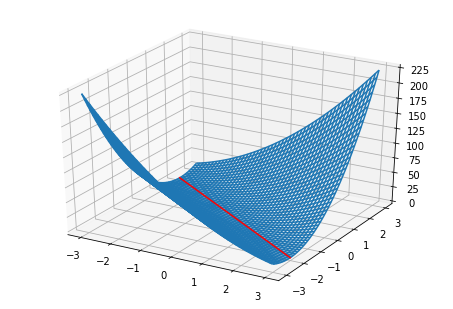

In [32]:
from mpl_toolkits.mplot3d import Axes3D
plt.close()
N = 100
x = np.arange(-3, 3, 1/N)
y = np.arange(-3, 3, 1/N)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i][j] = 4*X[i][j]*X[i][j]+12*X[i][j]*Y[i][j]+9*Y[i][j]*Y[i][j]
        
y2 = -2*x/3
z = np.zeros_like(y2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
ax.plot(x, y2, z, color='red')
plt.show()

## 1.6.24
2次関数$P(u)$について調べるもう一つの方法は次の通りである．まず，次の等式を確かめよ．

$$P(u) = \frac{1}{2}u^TKu-u^Tf　は　\frac{1}{2}(u-K^{-1}f)^TK(u-K^{-1}f)-\frac{1}{2}f^TK^{-1}f　に等しい．$$

最後の項 $-\frac{1}{2}f^TK^{-1}f$ は$P_{min}$ である．もう一方の(長い)項は常に...である．  
$u = K^{-1}f$ のとき，この長い項はゼロとなり，したがって$P = P_{min}$ となる．
### 解答

#### この式変形がわかりません．(1.6.25も同じ)

## 1.6.25
$P(u) = u_1^2+u_2^2-c(u_1^2+u_2^2)^4$ について，1階微分 $f = \partial P / \partial u$ と2階微分の行列$H$を求めよ．  
点 $u^0 = (1, 0)$ から始めて，ニュートン反復(21)を実行せよ．$u^1$が極小点$u^* = (0, 0)$ に近づくのは，$c$がどんな値のときか？  
点 $(0, 0)$が大域的な最小点でないのはなぜか？
### 解答

教科書だけじゃよくわからなかったので，ニュートン法のアルゴリズムについて詳しく調べました．  

ニュートン法において，教科書の式(20)を最小にする新たな点$u_{i+1}$を決定する必要があります．そこで$P_{cutoff}(u)$について考えると，

$$
\begin{align}
P_{cutoff}(u^{i+1}) &= P(u^i) + (u^{i+1}-u^i)^T \frac{\partial P}{\partial u} + \frac{1}{2} (u^{i+1}-u^i)^T H (u^{i+1}-u^i) \\
              &= P(u^i) - \frac{1}{2} (\frac{\partial P}{\partial u})^T H ^{-1} \frac{\partial P}{\partial u}
                 + \frac{1}{2} (u^{i+1}-u^i+H^{-1}p)^T H (u^{i+1}-u^i+H^{-1}p)
\end{align}
$$

#### この式変形どうやってるの？

極小点ではヘッシアンは正定値であり，$u^{i+1}-u^i+H^{-1}p = 0$のとき最小値を取る．
つまり，

$$
u^{i+1} = u^i - H^{-1}p
$$

これが式(21)である．わかりにくい・・・．  
  
  
では本文の問題を考えてみよう．

$$
f = \partial P / \partial u = \begin{pmatrix}2u_1-8cu_1(u_1^2+u_2^2)^3 & 2u_2-8cu_2(u_1^2+u_2^2)^3\end{pmatrix}^T
$$

$$
H= \begin{pmatrix}2-56cu_1^2(u_1^2+u_2^2)^2-8cu_2^2(u_1^2+u_2^2)^2 & -48cu_1u_2(u_1^2+u_2^2)^2 \\
                     -48cu_1u_2(u_1^2+u_2^2)^2 & 2-8cu_1^2(u_1^2+u_2^2)^2-56cu_2^2(u_1^2+u_2^2)^2\end{pmatrix}
$$
                     
そして$u^0 = (1, 0)$から開始することを考えると，

$$
\begin{align}
f(u^0) &= \begin{pmatrix}2-8c & 0\end{pmatrix}^T \\
\\
H &= \begin{pmatrix}2-56c & 0 \\ 0 & 2-8c\end{pmatrix}
\end{align}
$$

$$
H ^ {-1} = \frac{1}{(2-56c)(2-8c)}\begin{pmatrix}2-8c & 0 \\ 0 & 2-56c\end{pmatrix}
$$

ゆえに

$$
\begin{align}
u^1 &= u^0 - \frac{1}{(2-56c)(2-8c)}\begin{pmatrix}2-8c & 0 \\ 0 & 2-56c\end{pmatrix}\begin{pmatrix}2-8c \\ 0\end{pmatrix} \\
    & = \begin{pmatrix}1 \\ 0\end{pmatrix} - \begin{pmatrix}\frac{2-8c}{2-56c} \\ 0\end{pmatrix}
\end{align}
$$

この$u^1$が(0,0)に近づくためには，$\frac{2-8c}{2-56c} > 0$である必要がある．  
この条件は$c = 1/4$のとき満たし，またこの場合変化量がゼロとなるため，(1,0)で不動となることがわかる．  
  
  
(0,0)が大域的な最小値とならないのは，$P(u)$の第三項から考えて当然である．

#### 試しに色々やってみよう

In [22]:
x = [1.0]
y = [0.0]
c = -3
# c = 1
# c = 3
epsilon = 0.000001
step = 100
i = 0
while True:
    f = np.array([[2*x[i]-8*c*x[i]*math.pow((x[i]*x[i]+y[i]*y[i]), 3)],[2*y[i]-8*c*y[i]*math.pow((x[i]*x[i]+y[i]*y[i]),3)]])
    H = np.array([[2-56*c*x[i]*x[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2)-8*c*y[i]*y[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2), -48*c*x[i]*y[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2)],
                  [-48*c*x[i]*y[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2), 2-8*c*x[i]*x[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2)-56*c*y[i]*y[i]*math.pow((x[i]*x[i]+y[i]*y[i]),2)]])
    H_inv = np.linalg.inv(H)
    u = np.array([[x[i]],[y[i]]])
    u_new = u - np.dot(H_inv, f)
    x.append(u_new[0][0])
    y.append(u_new[1][0])
    i += 1
    if (f[0][0]*f[0][0]+f[1][0]*f[1][0]) < epsilon:
        print(i)
        break

7


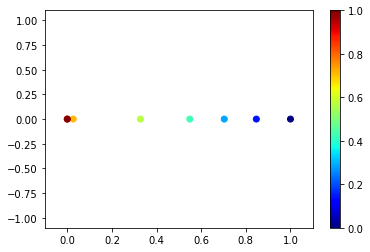

In [23]:
t = np.linspace(0,1,len(x))
plt.clf
plt.scatter(x,y,c=t, cmap='jet')
plt.colorbar()
plt.xlim([-0.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.show()

## 1.6.26
行列 $[C^{-1}　A; A^T　...]$ を半正定値にする最小の2,2ブロックは何か推測せよ．
### 解答

問題文の意味がわかりませんでした．

## 1.6.27
$H$ と $K$ を正定値とするとき，$M = \begin{pmatrix}H & 0 \\ 0 & K\end{pmatrix}$ が正定値であり，
$N = \begin{pmatrix}K & K \\ K & K\end{pmatrix}$がそうでないのはなぜかを説明せよ．  
$M$，$N$のピボットおよび固有値を$H$，$K$のピボットおよび固有値に関連させよ．$chol(M)$は$chol(H)$と$chol(K)$から組み立てられるか？
### 解答

行列$H$の大きさを$h \times h$，行列$K$の大きさを$k \times k$として$v^TMv$を考える．
$$
\begin{align}
vMv^T &= \begin{pmatrix}v_1 & \ldots & v_h & v_{h+1} & \ldots & v_{h+k}\end{pmatrix}
         \begin{pmatrix}H & 0 \\ 0 & K\end{pmatrix}
         \begin{pmatrix}v_1 & \ldots & v_h & v_{h+1} & \ldots & v_{h+k}\end{pmatrix}^T \\
      &= \begin{pmatrix}v_1 & \ldots & v_h\end{pmatrix}
         H
         \begin{pmatrix}v_1 & \ldots & v_h\end{pmatrix}^T +
         \begin{pmatrix}v_{h+1} & \ldots & v_{h+k}\end{pmatrix}
         K
         \begin{pmatrix}v_{h+1} & \ldots & v_{h+k}\end{pmatrix}^T \\
      &= v_hHv_h^T + v_kKv_k^T
\end{align}
$$

これをエネルギーの観点からみると，正のエネルギーと正のエネルギーの和であるので，行列$M$のエネルギーも正となり，つまり行列$M$も正定値である． 
  
でも求められていた計算はこれじゃない気がする・・・．ピボットについて考えてみます．  
行列$M$の掃き出し操作を考えると，行列$H$と行列$K$の掃き出しがそれぞれ独立しているため，ピボットは保存され，  
つまり行列$M$のピボットは全て正になると考えられる．  
一方で行列$N$の掃き出し操作を考えると，計算の過程で多くの行がゼロベクトルになってしまう．  
つまりピボットに0が含まれるようになり，正定値ではなくなる．  
  
行列$M$において，掃き出し操作が$H$，$K$に対して独立にできるので，  
$chol(M)$は$chol(H)$，$chol(K)$から組み立てられると思います．

## 1.6.28
次の"KKT行列"は固有値$\lambda_1 = 1，\lambda_2 = 2，\lambda_3 = -1$を持つ．したがって鞍型である．

$$\begin{pmatrix}w_1 & w_2 & u\end{pmatrix} 
   \begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & 1 \\ -1 & 1 & 0\end{pmatrix}
   \begin{pmatrix}w_1 \\ w_2 \\ u\end{pmatrix}
   = w_1^2+w_2^2-2uw_1+2uw_2
$$

この行列の単位固有ベクトルを平方の中に入れ，$\lambda = 1, 2, -1$を外に出す．

$$w_1^2+w_2^2-2uw_1+2uw_2 = 1(...)^2+2(...)^2-1(...)^2$$

となることを確認せよ．

最初の括弧の中には固有ベクトル$(1, -1, 0)/\sqrt{2}$からの$(w_1-w_2)/\sqrt{2}$が入る．これは，$LDL^T$の代わりに$Q\Lambda Q^T$を使っていることになる．  
その結果再び，2個の平方ひく1個の平方という結果が得られる．
### 解答

それぞれ固有ベクトルを求めると，  
$$
\begin{align}
v(\lambda=1) &= \frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1 & 0\end{pmatrix}^T \\
v(\lambda=2) &= \frac{1}{\sqrt{3}}\begin{pmatrix}1 & -1 & -1\end{pmatrix}^T \\
v(\lambda=-1) &= \frac{1}{\sqrt{6}}\begin{pmatrix}1 & -1 & 2\end{pmatrix}^T \\
\end{align}
$$

ゆえに$w_1^2+w_2^2-2uw_1+2uw_2$を平方完成すると

$$
w_1^2+w_2^2-2uw_1+2uw_2 = 1((w_1+w_2)/\sqrt{2})^2 + 2((w_1-w_2-u)/\sqrt{3})^2 -1((w_1-w_2+2u)/\sqrt{6})^2
$$

ここで重要なのは，固有値を用いて平方完成できることではなくて(この話は上でもあった)，急に出てきた"KKT行列"って何かって話だと思います．  
時間があったら調べます．

#### KKT行列って？
調べたらそれっぽいことやっている人いました．  
参考URL(http://myenigma.hatenablog.com/entry/2017/01/14/072805)  

KKT行列とはKarush-Kuhn-Tucker行列の略のようで，
なんらかの最適化をやるときに出てくる行列みたいです．  
最適化ということは何か関数値を最小化(最大化)したい場合だと思います．  
そのため，正定値かどうかが重要になってくるのでしょうか．

## 1.6.29
(重要)KKT行列の3つのピボットを求めよ．ピボットの積は固有値の積に等しいことを確認せよ(これはまた行列式とも等しい)．次にピボットを平方の外に出せ．

$$w_1^2+w_2^2-2uw_1+2uw_2 = 1(w_1-u)^2+1(w_2-u)^2-2(...)^2$$
### 解答

$$
KKT = \begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & 1 \\ -1 & 1 & 0\end{pmatrix}
$$

上記，”KKT行列”をLDL分解すると，

$$
\begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & -1 & 1\end{pmatrix}
\begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & 1 \\ -1 & 1 & 0\end{pmatrix}
\begin{pmatrix}1 & 0 & 1 \\ 0 & 1 & -1 \\ 0 & 0 & 1\end{pmatrix}
=  \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -2\end{pmatrix}
$$

$$
\begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & 1 \\ -1 & 1 & 0\end{pmatrix}
= \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ -1 & 1 & 1\end{pmatrix}
  \begin{pmatrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -2\end{pmatrix}
  \begin{pmatrix}1 & 0 & -1 \\ 0 & 1 & 1 \\ 0 & 0 & 1\end{pmatrix}
$$

つまり，ピポッドの積は固有値の積と一致していることがわかった．  
また固有値を下のセルのように計算すると，行列式ともいっちしていることがわかる．
さらに問題文の言うとおりにピボットを用いて平方完成すると，

$$
w_1^2+w_2^2-2uw_1+2uw_2 = 1(w_1-u)^2+1(w_2+u)^2-2u^2
$$

In [2]:
KKT = [[1, 0, -1], [0, 1, 1], [-1, 1, 0]]
np.linalg.det(KKT)

-2.0

## 1.6.30
(2012年に追加) $K$を正定値(対称)行列とする．その最後の行と列を取り除いたサイズ$n-1$の行列$L$とする．  
ピボットまたは行列式を用いて，$L$もまた正定値となる理由を説明せよ．エネルギーに基づく定義$u^TKu > 0$を用いて，$L$が正定値となる他の理由を与えよ．  
$v^TLv > 0$となることはどうやってわかるか？
### 解答

ピボットの計算を考えたら容易である．  
行列$K$のピボットを$p_1, p_2, ..., p_n$とすると，
$K$は正定値であるため$p_1, p_2, ..., p_n > 0$である．  

ここで行列$K$から最後の行と列を取り除いた行列$L$のピボットを考えると，  
掃き出し操作が一行（一列）減るだけなので，行列$L$のピボットは$p_1, p_2, ..., p_{n-1}$である．
つまりこのピボットも全て正であるため，行列$L$も正定値である．  

#### エネルギーに基づく定義から考えたら？

## 1.6.31
(2012年に追加)この問題では，ぶら下がりばねを表す3 x 3行列$H$を扱う．

$$H = \begin{pmatrix}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 1\end{pmatrix}$$

消去により，$H = LDL^T$を満たす下三角行列$L$と対称行列$D$を求めよ．  
右下の要素$H_{33} = 1$ を$q$で置き換えるとき，$H$を半正定値に保つ最小の$q$の値は何か？
### 解答

$$
H = \begin{pmatrix}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 1\end{pmatrix}
  = \begin{pmatrix}1 & 0 & 0 \\ -\frac{1}{2} & 1 & 0 \\ 0 & -\frac{2}{3} & 1\end{pmatrix}
    \begin{pmatrix}2 & 0 & 0 \\ 0 & \frac{3}{2} & 0 \\ 0 & 0 & \frac{1}{3}\end{pmatrix}
    \begin{pmatrix}1 & -\frac{1}{2} & 0 \\ 0 & 1 & -\frac{2}{3} \\ 0 & 0 & 1\end{pmatrix}
$$

もし$H_{33} = q$とした場合，

$$
H = \begin{pmatrix}2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 1\end{pmatrix}
  = \begin{pmatrix}1 & 0 & 0 \\ -\frac{1}{2} & 1 & 0 \\ 0 & -\frac{2}{3} & 1\end{pmatrix}
    \begin{pmatrix}2 & 0 & 0 \\ 0 & \frac{3}{2} & 0 \\ 0 & 0 & q-\frac{2}{3}\end{pmatrix}
    \begin{pmatrix}1 & -\frac{1}{2} & 0 \\ 0 & 1 & -\frac{2}{3} \\ 0 & 0 & 1\end{pmatrix}
$$

半正定値となるときピボットに0が含まれるため，半正定値を保つ最小の$q$の値は，$q = \frac{2}{3}$

#### q = 2/3 は何を意味する？